In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

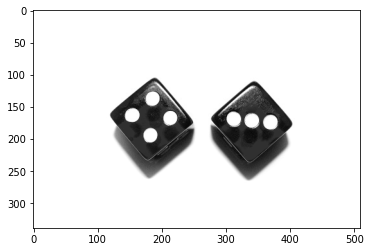

In [2]:
original_img = cv2.imread("1.jpg")
gray_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img, cmap="gray")

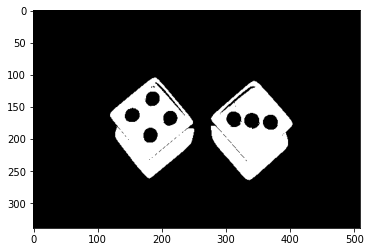

In [3]:
thresh = cv2.adaptiveThreshold(gray_img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 99, 10)
plt.imshow(thresh, cmap="gray")

2


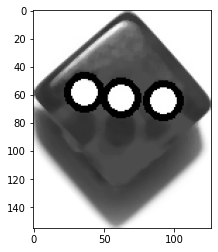

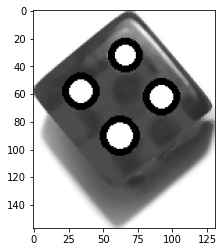

In [4]:
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
print(len(contours))

detected_dice = original_img.copy()
for c in contours:
    cv2.drawContours(detected_dice, c, -1, (0, 255, 0), 4)
    
dices = []
for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    new_dice = gray_img[y:y+h, x:x+w]
    dices.append(new_dice)
    
circles_in_dice_1 = cv2.HoughCircles(dices[0], cv2.HOUGH_GRADIENT, 1, 20, param1=40, param2=30, minRadius=10, maxRadius=20)
circles_in_dice_1 = np.uint8(np.round(circles_in_dice_1[0, :]))
dices[0] = cv2.medianBlur(dices[0], 5)
c1 = 0
for c in circles_in_dice_1:
    x, y, radius = c[0], c[1], c[2]
    cv2.circle(dices[0], (x, y), radius, (0, 255, 0), 4)
    c1 += 1

dices[1] = cv2.medianBlur(dices[1], 5)
c2 = 0
circles_in_dice_2 = cv2.HoughCircles(dices[1], cv2.HOUGH_GRADIENT, 1, 10, param1=40, param2=30, minRadius=10, maxRadius=20)
circles_in_dice_2 = np.uint8(np.round(circles_in_dice_2[0, :]))
for c in circles_in_dice_2:
    x, y, radius = c[0], c[1], c[2]
    cv2.circle(dices[1], (x, y), radius, (0, 255, 0), 4)
    c2 += 1
    
plt.imshow(dices[0], cmap="gray")
plt.show()

plt.imshow(dices[1], cmap="gray")
plt.show()

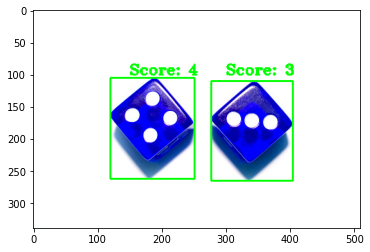

In [5]:
for i in range(len(contours)):
    x, y, w, h = cv2.boundingRect(contours[i])
    cv2.rectangle(original_img, (x, y), (x+w, y+h), (0, 255, 0), 2)
    if i == 0:
        cv2.putText(original_img, f"Score: {c1}", org=(300, 100), fontFace=cv2.FONT_HERSHEY_TRIPLEX, fontScale=0.75, color=(0, 255, 0),thickness=2)
    else:
        cv2.putText(original_img, f"Score: {c2}", org=(150, 100), fontFace=cv2.FONT_HERSHEY_TRIPLEX, fontScale=0.75, color=(0, 255, 0),thickness=2)

plt.imshow(original_img)